### Import libraries

In [1]:
import pandas as pd

In [2]:
import matplotlib.pyplot as plt
plt.style.use('classic')
%config InlineBackend.figure_format = 'retina'
%matplotlib inline
import seaborn as sns

### Import wide format data

In [3]:
afl_wide14 = pd.read_csv("all_afl_wide.csv")
aflwide = afl_wide14
aflwide.head()

,Unnamed: 0,seq,date,round,team1,gls_1,bhs_1,pts_1,team2,gls_2,...,year,month,t1,t2,draw_rt,etime_draw,draws_all,type,grp_2K,grp_1K
0,1,1,1897-05-08,R1,Fitzroy,6,13,49,Carlton,2,...,1897,5,FI,CA,0,0,0,reg_season,1,1
1,2,2,1897-05-08,R1,Collingwood,5,11,41,St Kilda,2,...,1897,5,CO,SK,0,0,0,reg_season,1,1
2,3,3,1897-05-08,R1,Geelong,3,6,24,Essendon,7,...,1897,5,GE,ES,0,0,0,reg_season,1,1
3,4,4,1897-05-08,R1,South Melbourne,3,9,27,Melbourne,6,...,1897,5,SM,ME,0,0,0,reg_season,1,1
4,5,5,1897-05-15,R2,South Melbourne,6,4,40,Carlton,5,...,1897,5,SM,CA,0,0,0,reg_season,1,1


### Delete the first column: 'Unnamed:0'

In [4]:
aflwide = aflwide.drop('Unnamed: 0', axis = 1)
aflwide.tail()

,seq,date,round,team1,gls_1,bhs_1,pts_1,team2,gls_2,bhs_2,...,year,month,t1,t2,draw_rt,etime_draw,draws_all,type,grp_2K,grp_1K
15312,15313,2018-06-22,R14,Port Adelaide,11,9,75,Melbourne,9,11,...,2018,6,PA,ME,0,0,0,reg_season,8,16
15313,15314,2018-06-23,R14,Hawthorn,13,18,96,Gold Coast,5,13,...,2018,6,HA,GC,0,0,0,reg_season,8,16
15314,15315,2018-06-23,R14,Brisbane,12,10,82,GWS Giants,16,13,...,2018,6,BR,GW,0,0,0,reg_season,8,16
15315,15316,2018-06-23,R14,Western Bulldogs,11,9,75,North Melbourne,12,5,...,2018,6,WB,NM,0,0,0,reg_season,8,16
15316,15317,2018-06-24,R14,Collingwood,11,13,79,Carlton,9,5,...,2018,6,CO,CA,0,0,0,reg_season,8,16


### The index and seq values are not aligned - reset index

In [5]:
aflwide.index += 1

In [6]:
aflwide.head()

,seq,date,round,team1,gls_1,bhs_1,pts_1,team2,gls_2,bhs_2,...,year,month,t1,t2,draw_rt,etime_draw,draws_all,type,grp_2K,grp_1K
1,1,1897-05-08,R1,Fitzroy,6,13,49,Carlton,2,4,...,1897,5,FI,CA,0,0,0,reg_season,1,1
2,2,1897-05-08,R1,Collingwood,5,11,41,St Kilda,2,4,...,1897,5,CO,SK,0,0,0,reg_season,1,1
3,3,1897-05-08,R1,Geelong,3,6,24,Essendon,7,5,...,1897,5,GE,ES,0,0,0,reg_season,1,1
4,4,1897-05-08,R1,South Melbourne,3,9,27,Melbourne,6,8,...,1897,5,SM,ME,0,0,0,reg_season,1,1
5,5,1897-05-15,R2,South Melbourne,6,4,40,Carlton,5,6,...,1897,5,SM,CA,0,0,0,reg_season,1,1


In [7]:
aflwide.dtypes

seq            int64
date          object
round         object
team1         object
gls_1          int64
bhs_1          int64
pts_1          int64
team2         object
gls_2          int64
bhs_2          int64
pts_2          int64
venue         object
state         object
hvar           int64
aggr           int64
year           int64
month          int64
t1            object
t2            object
draw_rt        int64
etime_draw     int64
draws_all      int64
type          object
grp_2K         int64
grp_1K         int64
dtype: object

In [8]:
# Add token column to enable game/yr count:
aflwide['game'] = 1  

## How many draws have there been?

In [9]:
aflwide['draws_all'].value_counts()

0    15157
1      160
Name: draws_all, dtype: int64

The 160 drawn matches includes two finals that were decided after extra-time. These were:
    * bbbb
    * acacac

In [10]:
aflwide['draw_rt'].value_counts()

0    15159
1      158
Name: draw_rt, dtype: int64

These 158 draws exclude the two extra-time decided matches. 

### Aggregate specific data by year, as required

### 1. Aggregate all_draws column, so that we have draws per year

In [11]:
yrdraws = aflwide.groupby(by=['year'])[['draws_all','game']].sum()
yrdraws.tail(10)

,draws_all,game
year,,
2009,2,185
2010,3,186
2011,3,196
2012,1,207
2013,1,207
2014,1,207
2015,2,206
2016,0,207
2017,3,207


In [12]:
yrdraws.reset_index(level=0, inplace=True)
yrdraws.dtypes

year         int64
draws_all    int64
game         int64
dtype: object

/Applications/anaconda/lib/python3.6/site-packages/seaborn/categorical.py:1428: FutureWarning: remove_na is deprecated and is a private function. Do not use.
  stat_data = remove_na(group_data)


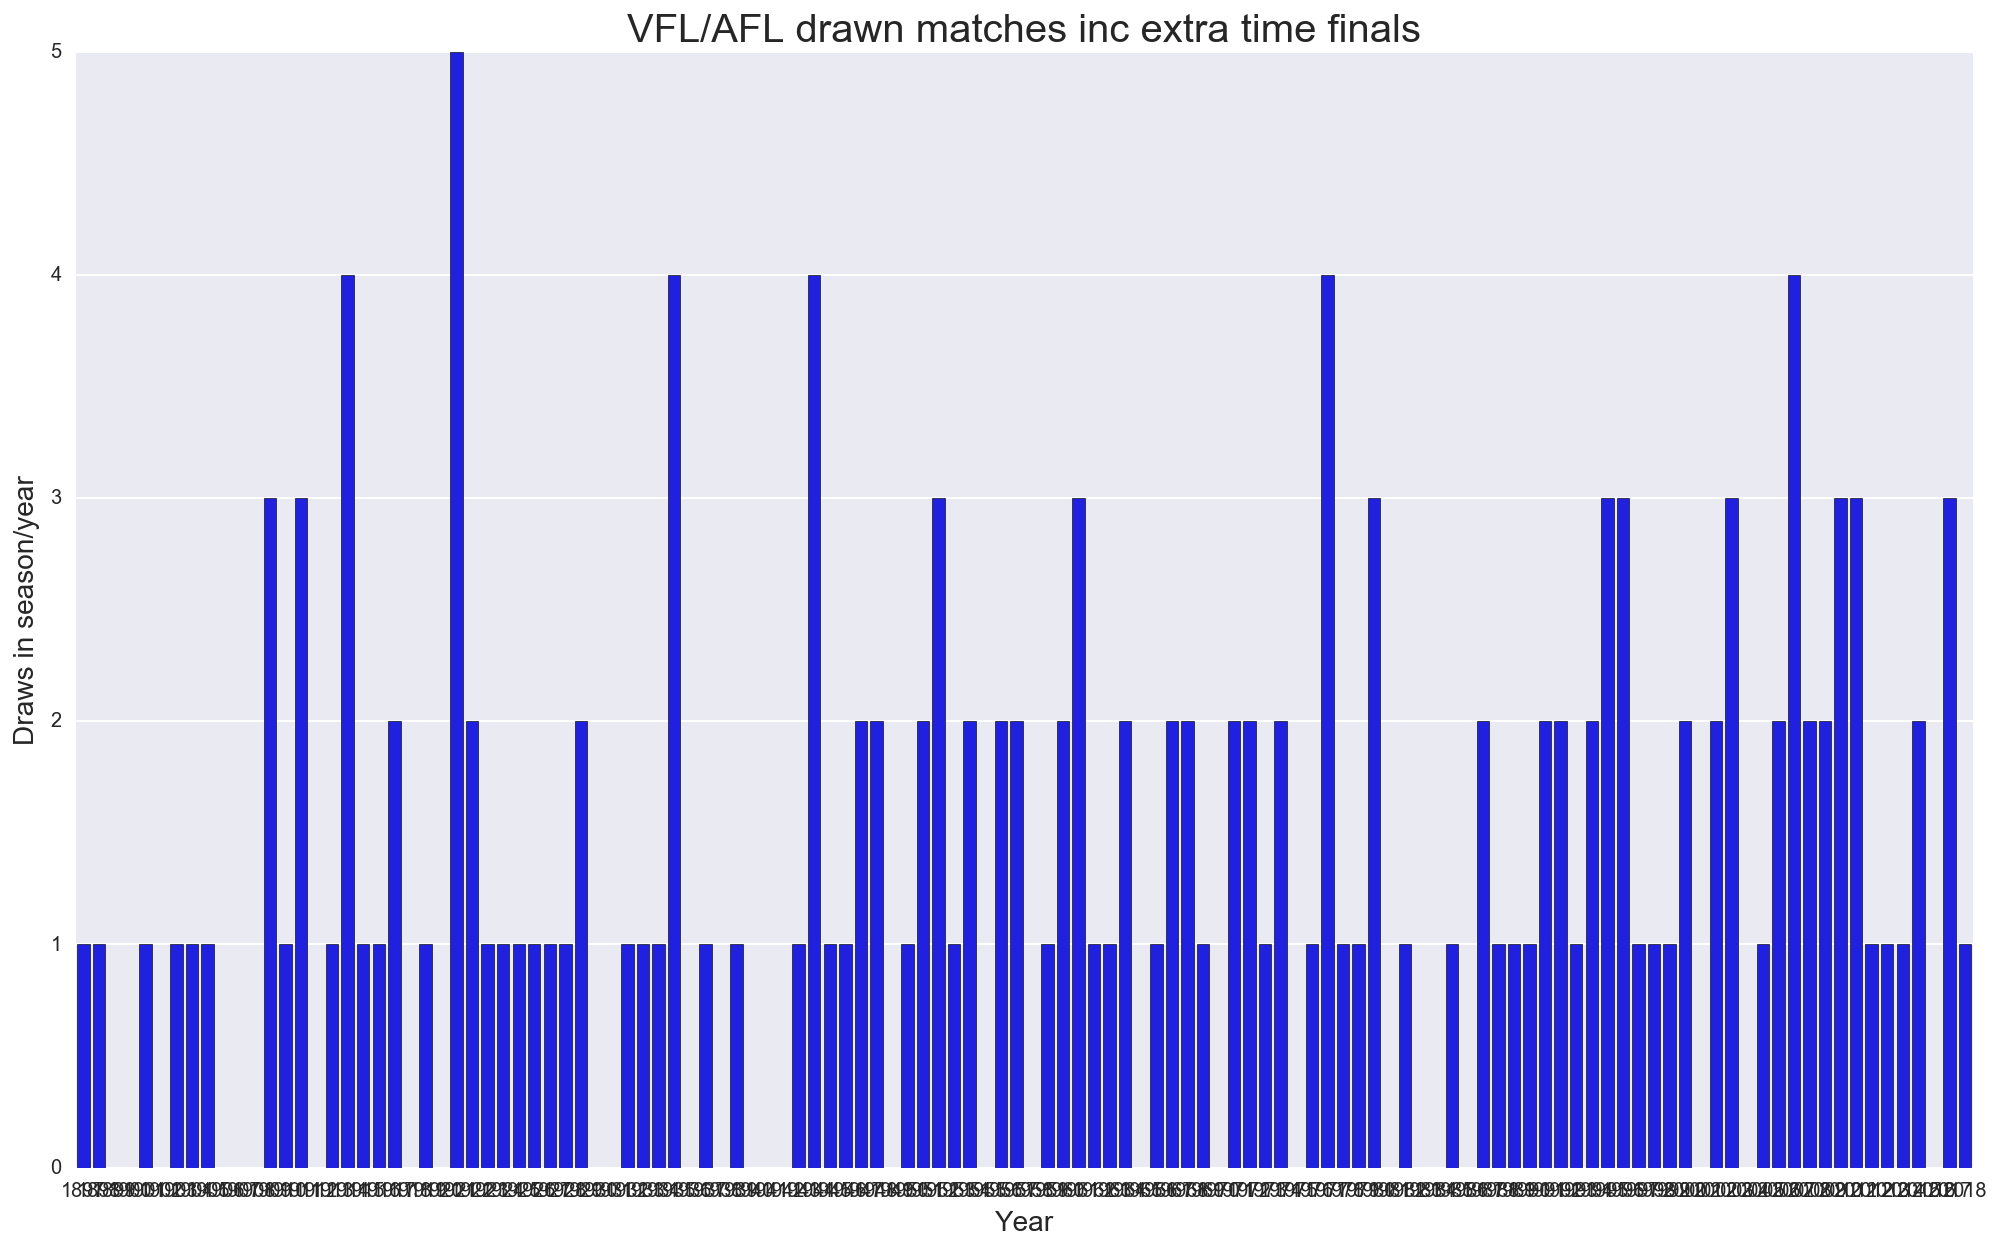

In [13]:
plt.subplots(figsize=(17,10))
tscores = sns.barplot(data = yrdraws,y= "draws_all", x= "year",color  = "blue")
plt.xlabel('Year',fontsize=14)
plt.ylabel('Draws in season/year', fontsize=14)
plt.title('VFL/AFL drawn matches inc extra time finals', fontsize=20)
plt.show()

### The rate of draws will be different to the yearly count of draws, since the number of games per year has changed many times since 1897.

In [14]:
yrdraws['rate_thou'] = yrdraws['draws_all']*1000/yrdraws['game']

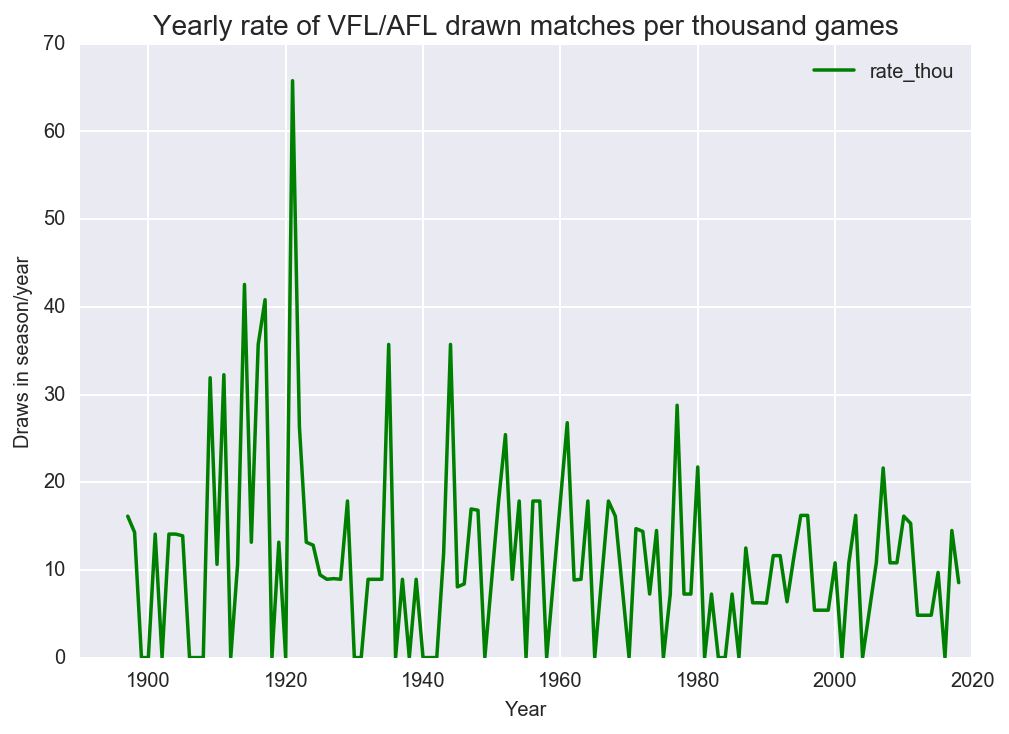

In [15]:
sns.set_style("darkgrid")
yrdraws.plot(kind = 'line', x = 'year', y = 'rate_thou', color = 'green',xlim = [1890,2020])
plt.xlabel('Year',fontsize=10)
plt.ylabel('Draws in season/year', fontsize=10)
plt.title('Yearly rate of VFL/AFL drawn matches per thousand games', fontsize=14)
plt.show()